<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [3]:
!pip install pandas 
!pip install matplotlib
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [4]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()

conn = sqlite3.connect(':memory:')
df.to_sql('main', conn, index=False, if_exists='replace')


--2025-08-15 03:58:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.7MB/s    in 2.3s    

2025-08-15 03:58:40 (64.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



65437

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


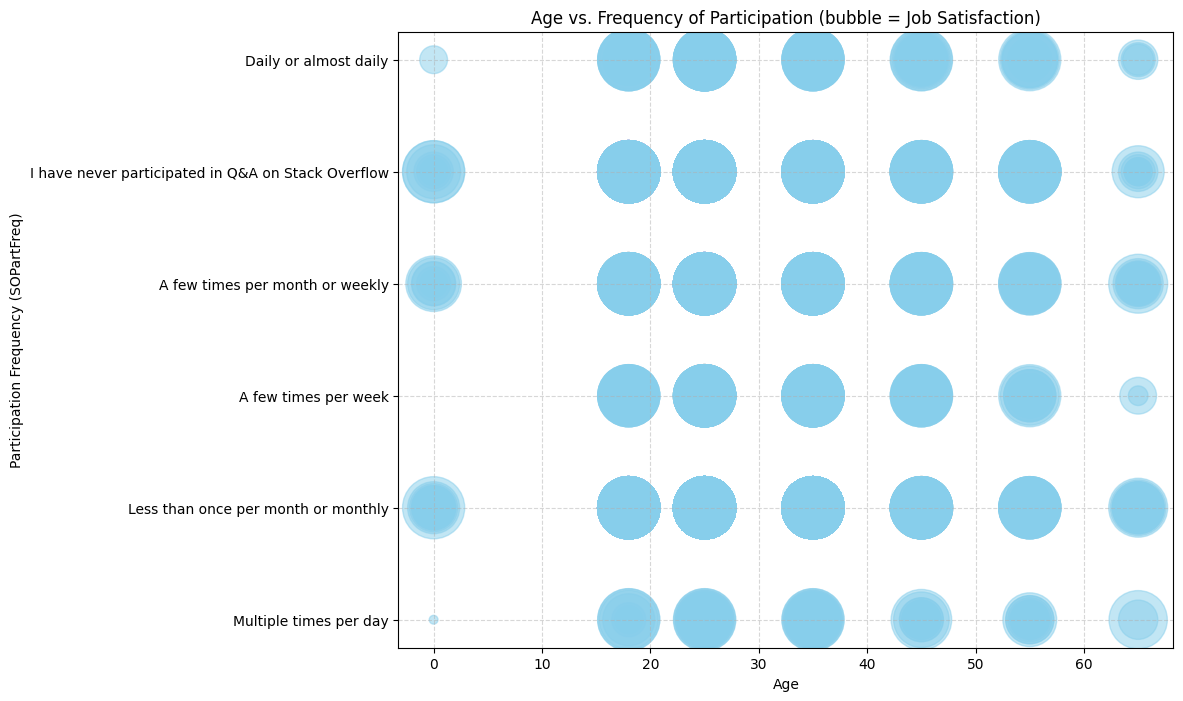

In [6]:
QUERY_1 = """
SELECT 
    CAST(substr(Age,1,instr(Age,' ')-1) AS INTEGER) AS Age,
    SOPartFreq,
    CAST(JobSatPoints_6 AS REAL) AS JobSat
FROM main
WHERE Age LIKE '% %' 
  AND SOPartFreq IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
"""
df1 = pd.read_sql_query(QUERY_1, conn).dropna()

plt.figure(figsize=(10,8))
plt.scatter(
    df1['Age'],
    df1['SOPartFreq'],
    s=df1['JobSat']*20,  # bubble size proportional to job satisfaction
    alpha=0.5,
    color='skyblue'
)
plt.xlabel('Age')
plt.ylabel('Participation Frequency (SOPartFreq)')
plt.title('Age vs. Frequency of Participation (bubble = Job Satisfaction)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


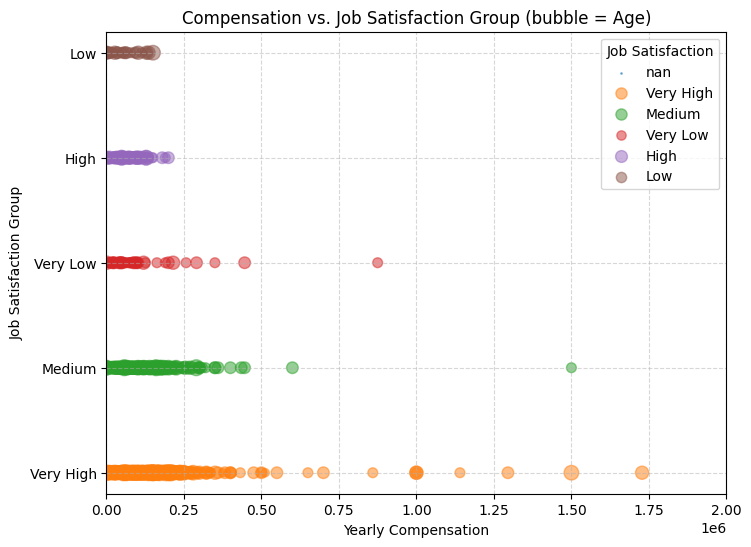

In [9]:
QUERY_2_grouped = """
SELECT 
    CAST(ConvertedCompYearly AS REAL) AS ConvertedCompYearly,
    CAST(JobSatPoints_6 AS REAL) AS JobSat,
    CAST(substr(Age,1,instr(Age,' ')-1) AS INTEGER) AS Age
FROM main
WHERE ConvertedCompYearly IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
  AND Age LIKE '% %'
"""
df2 = pd.read_sql_query(QUERY_2_grouped, conn).dropna()

df2['JobSatGroup'] = pd.cut(
    df2['JobSat'],
    bins=[0, 2, 4, 6, 8, 10],
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

plt.figure(figsize=(8,6))
for group in df2['JobSatGroup'].unique():
    subset = df2[df2['JobSatGroup'] == group]
    plt.scatter(
        subset['ConvertedCompYearly'],
        subset['JobSatGroup'],
        s=subset['Age']*2,  # bubble size = Age
        alpha=0.5,
        label=group
    )

plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Group')
plt.title('Compensation vs. Job Satisfaction Group (bubble = Age)')
plt.legend(title='Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0,2000000)
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [ ]:
QUERY_3 = """
SELECT 
    CAST(substr(Age,1,instr(Age,' ')-1) AS INTEGER) AS Age,
    LanguageHaveWorkedWith
FROM main
WHERE Age LIKE '% %' 
  AND LanguageHaveWorkedWith IS NOT NULL
"""
df3 = pd.read_sql_query(QUERY_3, conn).dropna()

df3_count = df3.groupby(['Age','LanguageHaveWorkedWith']).size().reset_index(name='Freq')

plt.figure(figsize=(12,6))
plt.scatter(
    df3_count['Age'],
    df3_count['LanguageHaveWorkedWith'],
    s=df3_count['Freq']*5,
    alpha=0.6,
    color='green'
)
plt.xlabel('Age')
plt.ylabel('Programming Language')
plt.title('Technology Preferences by Age (bubble = frequency)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [ ]:
QUERY_4 = """
SELECT 
    DatabaseWantToWorkWith,
    CAST(JobSatPoints_6 AS REAL) AS JobSat
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
"""
df4 = pd.read_sql_query(QUERY_4, conn).dropna()

df4_count = df4.groupby(['DatabaseWantToWorkWith','JobSat']).size().reset_index(name='Freq')

plt.figure(figsize=(10,6))
plt.scatter(
    df4_count['DatabaseWantToWorkWith'],
    df4_count['JobSat'],
    s=df4_count['Freq']*5,
    alpha=0.6,
    color='purple'
)
plt.xticks(rotation=90)
plt.xlabel('Database Preference')
plt.ylabel('Job Satisfaction')
plt.title('Preferred Databases vs. Job Satisfaction (bubble = # respondents)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [ ]:
QUERY_5 = """
SELECT 
    CAST(ConvertedCompYearly AS REAL) AS ConvertedCompYearly,
    DevType,
    CAST(JobSatPoints_6 AS REAL) AS JobSat
FROM main
WHERE ConvertedCompYearly IS NOT NULL
  AND DevType IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
"""
df5 = pd.read_sql_query(QUERY_5, conn).dropna()

plt.figure(figsize=(12,6))
plt.scatter(
    df5['DevType'],
    df5['ConvertedCompYearly'],
    s=df5['JobSat']*5,
    alpha=0.6,
    color='red'
)
plt.xticks(rotation=90)
plt.xlabel('Developer Role')
plt.ylabel('Yearly Compensation')
plt.title('Compensation Across Developer Roles (bubble = Job Satisfaction)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [ ]:
QUERY_6 = """
SELECT 
    CAST(substr(Age,1,instr(Age,' ')-1) AS INTEGER) AS Age,
    NEWCollabToolsHaveWorkedWith
FROM main
WHERE Age LIKE '% %'
  AND NEWCollabToolsHaveWorkedWith IS NOT NULL
"""
df6 = pd.read_sql_query(QUERY_6, conn).dropna()

df6_count = df6.groupby(['Age','NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Freq')

plt.figure(figsize=(12,6))
plt.scatter(
    df6_count['Age'],
    df6_count['NEWCollabToolsHaveWorkedWith'],
    s=df6_count['Freq']*5,
    alpha=0.6,
    color='cyan'
)
plt.xlabel('Age')
plt.ylabel('Collaboration Tools')
plt.title('Collaboration Tools by Age (bubble = frequency)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [ ]:
QUERY_7 = """
SELECT 
    WebframeWantToWorkWith,
    CAST(JobSatPoints_6 AS REAL) AS JobSat
FROM main
WHERE WebframeWantToWorkWith IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
"""
df7 = pd.read_sql_query(QUERY_7, conn).dropna()
df7_count = df7.groupby(['WebframeWantToWorkWith','JobSat']).size().reset_index(name='Freq')

plt.figure(figsize=(12,6))
plt.scatter(
    df7_count['WebframeWantToWorkWith'],
    df7_count['JobSat'],
    s=df7_count['Freq']*5,
    alpha=0.6,
    color='magenta'
)
plt.xticks(rotation=90)
plt.xlabel('Web Framework')
plt.ylabel('Job Satisfaction')
plt.title('Preferred Web Frameworks vs. Job Satisfaction (bubble = # respondents)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
QUERY_8 = """
SELECT 
    LanguageAdmired,
    Country
FROM main
WHERE LanguageAdmired IS NOT NULL
  AND Country IS NOT NULL
"""
df8 = pd.read_sql_query(QUERY_8, conn).dropna()
df8_count = df8.groupby(['Country','LanguageAdmired']).size().reset_index(name='Freq')

plt.figure(figsize=(12,6))
plt.scatter(
    df8_count['LanguageAdmired'],
    df8_count['Country'],
    s=df8_count['Freq']*5,
    alpha=0.6,
    color='gold'
)
plt.xticks(rotation=90)
plt.xlabel('Admired Technology')
plt.ylabel('Country')
plt.title('Admired Technologies Across Countries (bubble = frequency)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
